In [125]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_excel('data/Yahoo Ticker Symbols - September 2017.xlsx')

In [38]:
columns = ['Ticker','Name','Exchange','Category Name','Country']

In [41]:
df = pd.DataFrame(data = df.iloc[3:].values,columns=df.iloc[2].values).loc[:,columns]

In [80]:
big_tech_tickers  ={'AAPL':'Apple Inc.','AMZN':'Amazon.com, Inc.','MSFT':'Microsoft Corporation',
                    'BABA':'Alibaba Group Holding Limited',
                    'FB':'Facebook, Inc.','GOOG':'Alphabet Inc.','TCTZF':'Tencent Holdings Limited'
                    ,'BIDU':'Baidu, Inc.'}

In [49]:
df = df.dropna(subset=['Name'])

In [56]:
df[df.Name.str.contains('Baidu')]

,Ticker,Name,Exchange,Category Name,Country
2026,BIDU,"Baidu, Inc.",NMS,Internet Information Providers,USA
14618,K3SD.SI,"Baidu, Inc.",SES,NaN,Singapore
20664,BIDUN.MX,"Baidu, Inc.",MEX,Internet Information Providers,Mexico
21674,B1C.F,"Baidu, Inc.",FRA,Internet Information Providers,France
30617,BIDU.SW,"Baidu, Inc.",EBS,NaN,Switzerland
30964,B1C.SG,Baidu Inc. R.Shs A(Sp.ADRs)1/10,STU,Internet Information Providers,Germany
102813,B1C.DE,"Baidu, Inc.",GER,Internet Information Providers,Germany


In [91]:
def get_stock_history(symbol,period='10y',name=None):
    
    if name: 
        df = (
            yf.Ticker(symbol).history(period=period)
            .assign(Ticker=symbol)
            .assign(Name=name)
        )
    else:
        df = (
            yf.Ticker(symbol).history(period=period)
            .assign(Ticker=symbol)
        )
    
    return df

In [141]:
def get_multiple_stock_history(ticker_dict):
    df = pd.DataFrame(columns = get_stock_history(list(ticker_dict.keys())[0]).columns)
    for key,name in ticker_dict.items():
        df= pd.concat((df, get_stock_history(key,period='3mo',name=name)))
    df['Date'] = df.index
    df =df.reset_index(drop=True)
    return df

In [142]:
df = get_multiple_stock_history(big_tech_tickers)

In [138]:
df['Close'] = (
    df.groupby('Name')
    .Close
    .apply(lambda x: x/x.max())
)

In [139]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Name,Date
0,288.77,292.00,284.54,0.888845,36028600,0.0,0,AAPL,Apple Inc.,2019-12-30
1,289.24,292.98,288.83,0.895324,25201400,0.0,0,AAPL,Apple Inc.,2019-12-31
2,295.54,299.89,294.49,0.915770,33870100,0.0,0,AAPL,Apple Inc.,2020-01-02
3,296.45,299.87,295.80,0.906877,36580700,0.0,0,AAPL,Apple Inc.,2020-01-03
4,293.09,299.25,292.06,0.914089,29596800,0.0,0,AAPL,Apple Inc.,2020-01-06
...,...,...,...,...,...,...,...,...,...,...
491,89.03,92.15,86.23,0.631237,4709300,0.0,0,BIDU,"Baidu, Inc.",2020-03-23
492,95.18,98.92,95.05,0.667289,5640100,0.0,0,BIDU,"Baidu, Inc.",2020-03-24
493,97.00,102.05,95.08,0.670680,6231000,0.0,0,BIDU,"Baidu, Inc.",2020-03-25
494,98.61,102.46,97.32,0.704588,5109500,0.0,0,BIDU,"Baidu, Inc.",2020-03-26


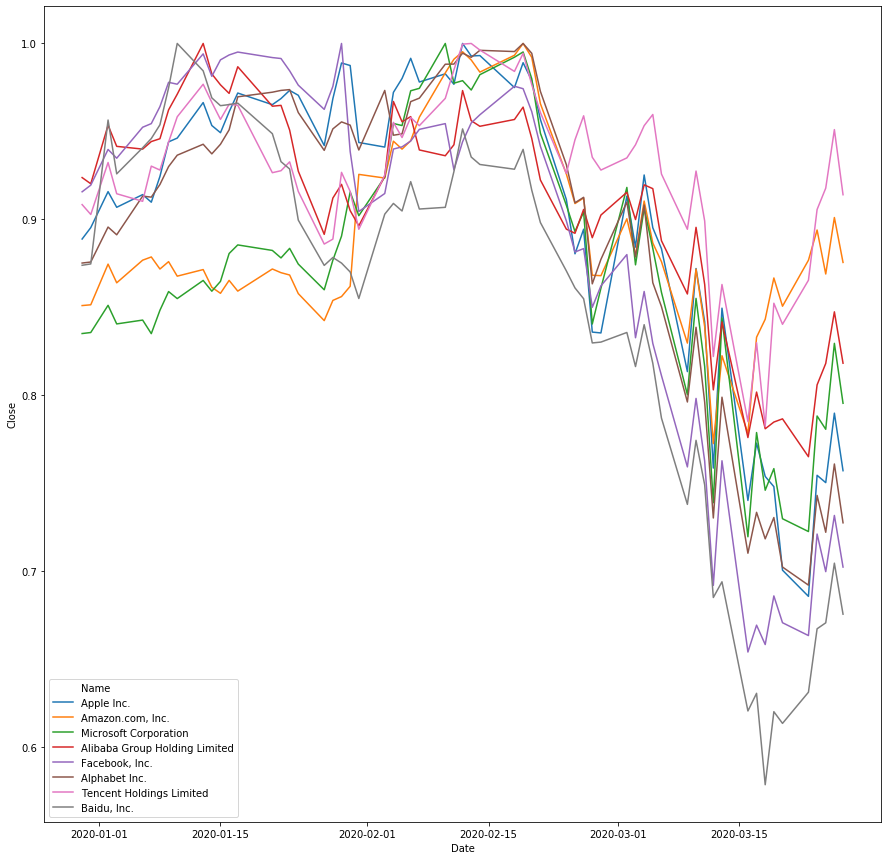

In [140]:
figure = plt.figure(figsize=(15,15))
sns.lineplot(data=df,hue='Name',x='Date',y='Close')